In [0]:
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set_style('whitegrid')

%matplotlib inline


In [0]:
titanic_df = pd.read_csv('/content/train.csv')


In [53]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


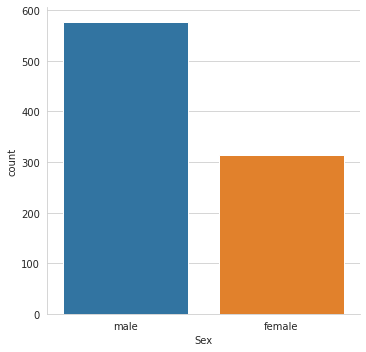

In [54]:
sns.factorplot('Sex',data=titanic_df,kind='count')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


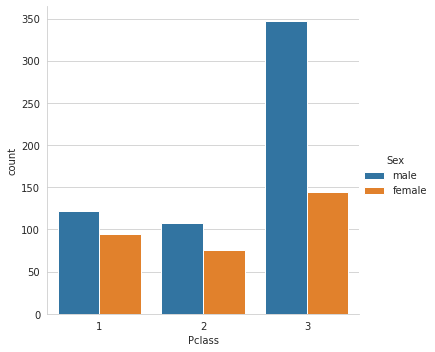

In [55]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [0]:
##This gives us an insight that there are quite a few males than females in 3rd class. Now lets dig deeper and find the children among the passengers.

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex

titanic_df['person'] = titanic_df[['Age','Sex']].apply(titanic_children,axis=1)
        

In [57]:
titanic_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


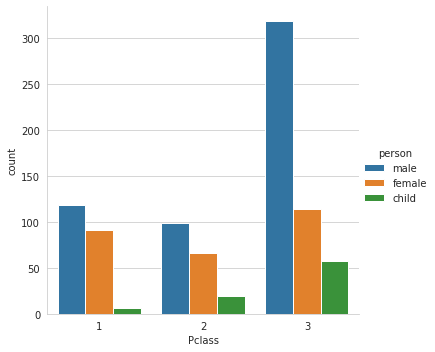

In [58]:
sns.factorplot('Pclass',data=titanic_df,hue='person',kind='count')

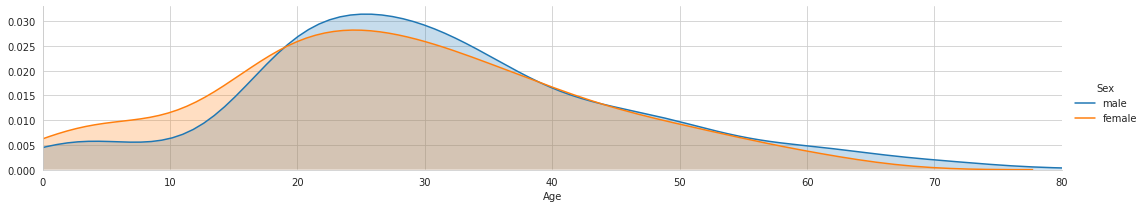

In [59]:
as_fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

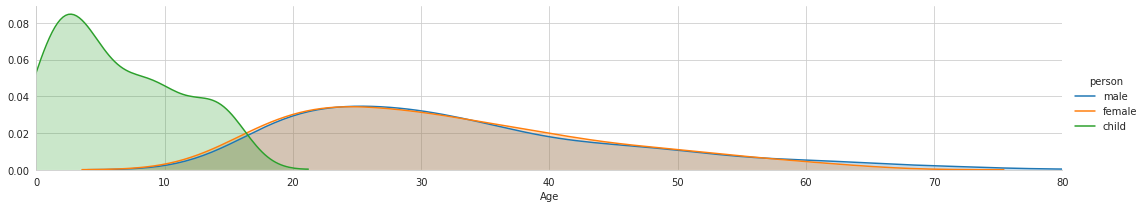

In [60]:
as_fig = sns.FacetGrid(titanic_df,hue='person',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

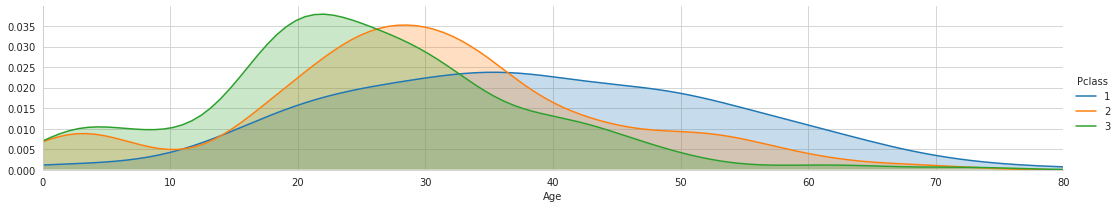

In [61]:
as_fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=5)

as_fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()

In [62]:
###Mean age of the passengers
titanic_df['Age'].mean()

29.69911764705882

In [0]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [0]:
#### Drop the Cabin column as there are many null values and it does not help in making prediction

titanic_df.drop('Cabin',axis=1,inplace=True)

In [65]:
titanic_df.isnull().values.any()

True

In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,male


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


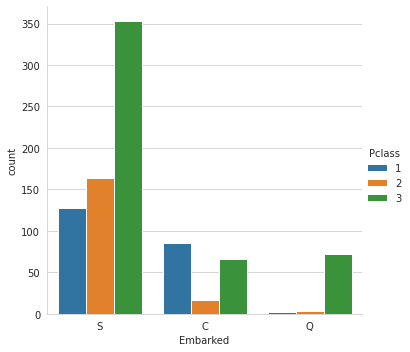

In [67]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count')


In [0]:
## Let's check who are with family and who are alone
## This can be found by adding Parch and Sibsp columns
titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp


In [69]:
## if Alone value is >0 then they are with family else they are Alone

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Without Family'


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


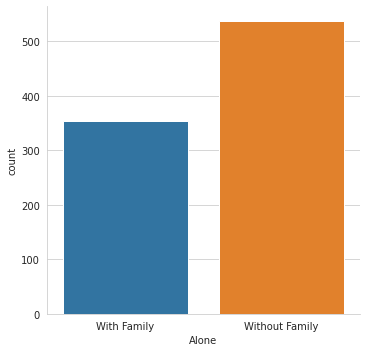

In [70]:
sns.factorplot('Alone',kind='count',data=titanic_df)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


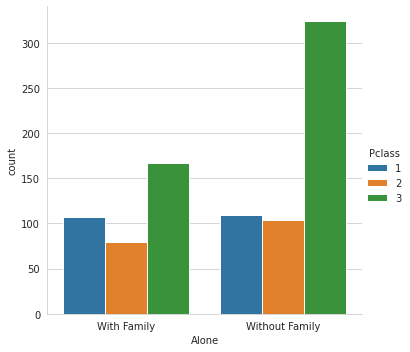

In [71]:
sns.factorplot('Alone',kind='count',data=titanic_df,hue='Pclass')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


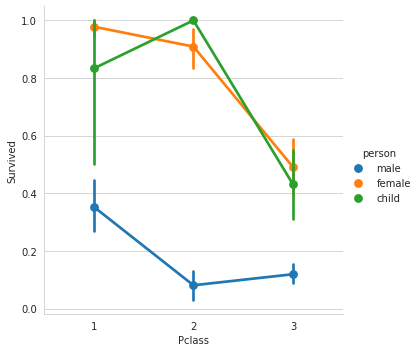

In [72]:
sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')


In [0]:
#Above graph show that survival rate of maleis much lower.

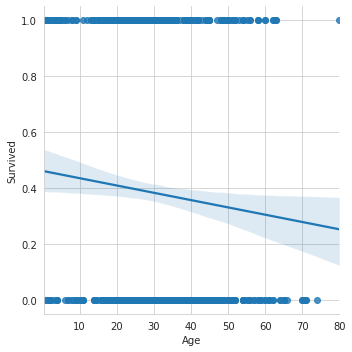

In [73]:
sns.lmplot('Age','Survived',data=titanic_df)


In [0]:
person_dummies = pd.get_dummies(titanic_df['person'])
alone_dummies = pd.get_dummies(titanic_df['Alone'])

embarked_dummies = pd.get_dummies(titanic_df['Embarked'])

embarked_dummies.drop('Q',axis=1,inplace=True)
pclass_dummies = pd.get_dummies(titanic_df['Pclass'])

pclass_dummies.columns=['class_1','class_2','class_3']
import math

titanic_df['Age'] = titanic_df['Age'].apply(math.ceil)
titanic_df['Fare'] = titanic_df['Fare'].apply(math.ceil)
titanic_df = pd.concat([titanic_df,pclass_dummies,person_dummies,alone_dummies,embarked_dummies],axis=1)
titanic_df.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Embarked'],axis=1,inplace=True)
titanic_df.drop(['Alone','person','Pclass','Without Family','male','class_3'],axis=1,inplace=True)

In [75]:
titanic_df.head()


,Survived,Age,Fare,class_1,class_2,child,female,With Family,C,S
0,0,22,8,0,0,0,0,1,0,1
1,1,38,72,1,0,0,1,1,1,0
2,1,26,8,0,0,0,1,0,0,1
3,1,35,54,1,0,0,1,1,0,1
4,0,35,9,0,0,0,0,0,0,1


In [76]:
#Will form the train and test set using the train_test_split
titanic_train = titanic_df.drop('Survived',axis=1)
titanic_survived = titanic_df.Survived
x_train, x_test, y_train, y_test = train_test_split(titanic_train,titanic_survived,test_size=0.2)
x_train.head()


,Age,Fare,class_1,class_2,child,female,With Family,C,S
200,28,10,0,0,0,0,0,0,1
784,25,8,0,0,0,0,0,0,1
410,30,8,0,0,0,0,0,0,1
862,48,26,1,0,0,1,0,0,1
358,30,8,0,0,0,1,0,0,0


In [0]:
from sklearn.ensemble import GradientBoostingClassifier
model1 = GradientBoostingClassifier(learning_rate=0.1,max_depth=3)
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)


In [0]:

import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB



In [0]:
model_params = {
     'svm':{
         'model': SVC(gamma='auto'),
         'params': {
             'C': [1,10,20],
             'kernel':['rbf','linear']
             
         }
     },

     'randam_forst':{
         'model':RandomForestClassifier(),
         'params':{
             'n_estimators':[100, 150, 200],
             'max_depth':[3,4,5,6,7,8,32]
             
         }
     },

      'Logistic_Regression':{
         'model':LogisticRegression(solver='liblinear'),
         'params':{
             'multi_class':['auto', 'ovr',],
             'C':[1,5,10]
         }
     },

     'Gaussian_Bayes':{
         'model':GaussianNB(),
         'params':{
             
         }
     },
   
    'X_boost':{
         'model':xgb.XGBRegressor(),
         'params':{
             "colsample_bytree": [0.7, 0.3],
             "gamma": [0, 0.5],
             "learning_rate": [0.03, 0.3], # default 0.1 
             "max_depth": [2,4, 6], # default 3
             "n_estimators": [100,120,150], # default 100
             "subsample": [0.6, 0.4]
             
     
         }
     },


     
     
     'Multinomail':{
         'model':MultinomialNB(),
         'params':{
             'alpha':[1,5,15],
             'fit_prior':['True','False']

             
         }
     },



}

In [101]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=3,return_train_score = False)
  clf.fit(x_train,y_train)
  scores.append({
      'Model': model_name,
      'best_Params' : clf.best_params_,
      'Best_Scores' : clf.best_score_
  })

[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [102]:
sr = pd.DataFrame(scores)
sr

,Model,best_Params,Best_Scores
0,svm,"{'C': 1, 'kernel': 'linear'}",0.785088
1,randam_forst,"{'max_depth': 8, 'n_estimators': 150}",0.801924
2,Logistic_Regression,"{'C': 1, 'multi_class': 'auto'}",0.792085
3,Gaussian_Bayes,{},0.738728
4,X_boost,"{'colsample_bytree': 0.7, 'gamma': 0.5, 'learn...",0.371579
5,Multinomail,"{'alpha': 1, 'fit_prior': 'True'}",0.696610
